# Bangladesh Weather Dataset LSTM

In [225]:
import tensorflow as tf
import os
import pandas as pd
import numpy as np

## Importing the dataset

In [226]:
!cp "/content/drive/MyDrive/Colab Notebooks/Bangladesh/Temp_and_rain.csv" "/content/bangladeshweather.csv"

In [227]:
df = pd.read_csv('/content/bangladeshweather.csv')
df

,tem,Month,Year,rain
0,16.9760,1,1901,18.53560
1,19.9026,2,1901,16.25480
2,24.3158,3,1901,70.79810
3,28.1834,4,1901,66.16160
4,27.8892,5,1901,267.21500
...,...,...,...,...
1375,28.0642,8,2015,512.12700
1376,28.1230,9,2015,353.86900
1377,26.8624,10,2015,81.59940
1378,23.1842,11,2015,4.60815


In [228]:
df.columns

Index(['tem', 'Month', 'Year', 'rain'], dtype='object')

In [229]:
#df.index = pd.to_datetime(df['Date Time'], format='%d.%m.%Y %H:%M:%S')
#df[:25]

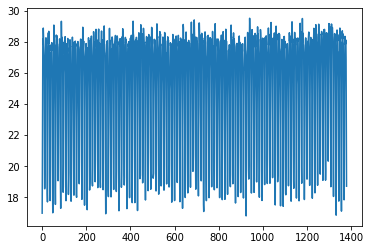

In [230]:
temp = df['tem']
temp.plot()

In [231]:
#df[' _tempm'].fillna(df[' _tempm'].mean(), inplace = True)
#df[' _tempm'] = df[' _tempm'].interpolate()

In [232]:
def df_to_X_y(df, window_size=5):
  df_as_np = df.to_numpy()
  X = []
  y = []
  for i in range(len(df_as_np)-window_size):
    row = [[a] for a in df_as_np[i:i+window_size]]
    X.append(row)
    label = df_as_np[i+window_size]
    y.append(label)
  return np.array(X), np.array(y)

In [233]:
WINDOW_SIZE = 6
X1, y1 = df_to_X_y(temp, WINDOW_SIZE)
X1.shape, y1.shape

((1374, 6, 1), (1374,))

## Splitting the dataset

In [234]:
X_train1, y_train1 = X1[:1096], y1[:1096]
X_val1, y_val1 = X1[1096:1233], y1[1096:1233]
X_test1, y_test1 = X1[1233:], y1[1233:]
X_train1.shape, y_train1.shape, X_val1.shape, y_val1.shape, X_test1.shape, y_test1.shape

((1096, 6, 1), (1096,), (137, 6, 1), (137,), (141, 6, 1), (141,))

## Building the network

In [235]:
from keras.models import Sequential
from keras.layers import *
from keras.callbacks import ModelCheckpoint
from keras.losses import MeanSquaredError
from keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam

model1 = Sequential()
model1.add(InputLayer((6, 1)))
model1.add(LSTM(64))
model1.add(Dense(32, 'relu'))
model1.add(Dense(32, 'relu'))
model1.add(Dense(16, 'relu'))
model1.add(Dense(8, 'relu'))
model1.add(Dense(1, 'linear'))

model1.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_14 (LSTM)              (None, 64)                16896     
                                                                 
 dense_34 (Dense)            (None, 32)                2080      
                                                                 
 dense_35 (Dense)            (None, 32)                1056      
                                                                 
 dense_36 (Dense)            (None, 16)                528       
                                                                 
 dense_37 (Dense)            (None, 8)                 136       
                                                                 
 dense_38 (Dense)            (None, 1)                 9         
                                                                 
Total params: 20,705
Trainable params: 20,705
Non-tra

In [236]:
cp1 = ModelCheckpoint('model1/', save_best_only=True)
model1.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError()])

## Training

In [237]:
history1 = model1.fit(X_train1, y_train1, validation_data=(X_val1, y_val1), epochs=150, callbacks=[cp1])

Epoch 1/150
30/35 [========================>.....] - ETA: 0s - loss: 641.9914 - root_mean_squared_error: 25.3375

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


35/35 [==============================] - 8s 171ms/step - loss: 640.8844 - root_mean_squared_error: 25.3157 - val_loss: 644.6304 - val_root_mean_squared_error: 25.3896
Epoch 2/150
27/35 [======================>.......] - ETA: 0s - loss: 630.8255 - root_mean_squared_error: 25.1162

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


35/35 [==============================] - 5s 137ms/step - loss: 635.5588 - root_mean_squared_error: 25.2103 - val_loss: 639.5094 - val_root_mean_squared_error: 25.2885
Epoch 3/150
34/35 [============================>.] - ETA: 0s - loss: 631.7328 - root_mean_squared_error: 25.1343

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


35/35 [==============================] - 5s 156ms/step - loss: 630.9883 - root_mean_squared_error: 25.1195 - val_loss: 634.8298 - val_root_mean_squared_error: 25.1958
Epoch 4/150
30/35 [========================>.....] - ETA: 0s - loss: 622.6061 - root_mean_squared_error: 24.9521

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


35/35 [==============================] - 5s 138ms/step - loss: 625.1915 - root_mean_squared_error: 25.0038 - val_loss: 627.6288 - val_root_mean_squared_error: 25.0525
Epoch 5/150
27/35 [======================>.......] - ETA: 0s - loss: 618.8210 - root_mean_squared_error: 24.8761

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


35/35 [==============================] - 5s 154ms/step - loss: 614.9785 - root_mean_squared_error: 24.7988 - val_loss: 612.6577 - val_root_mean_squared_error: 24.7519
Epoch 6/150
30/35 [========================>.....] - ETA: 0s - loss: 596.2797 - root_mean_squared_error: 24.4188

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


35/35 [==============================] - 5s 137ms/step - loss: 595.0402 - root_mean_squared_error: 24.3934 - val_loss: 586.7305 - val_root_mean_squared_error: 24.2225
Epoch 7/150
29/35 [=======================>......] - ETA: 0s - loss: 563.5906 - root_mean_squared_error: 23.7401

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


35/35 [==============================] - 5s 153ms/step - loss: 559.8711 - root_mean_squared_error: 23.6616 - val_loss: 536.9795 - val_root_mean_squared_error: 23.1728
Epoch 8/150
28/35 [=======================>......] - ETA: 0s - loss: 500.2354 - root_mean_squared_error: 22.3659

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


35/35 [==============================] - 5s 138ms/step - loss: 494.2407 - root_mean_squared_error: 22.2315 - val_loss: 454.2626 - val_root_mean_squared_error: 21.3134
Epoch 9/150
29/35 [=======================>......] - ETA: 0s - loss: 403.2419 - root_mean_squared_error: 20.0809

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


35/35 [==============================] - 5s 135ms/step - loss: 396.4296 - root_mean_squared_error: 19.9105 - val_loss: 340.4336 - val_root_mean_squared_error: 18.4508
Epoch 10/150
29/35 [=======================>......] - ETA: 0s - loss: 288.8487 - root_mean_squared_error: 16.9956

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


35/35 [==============================] - 5s 161ms/step - loss: 277.7839 - root_mean_squared_error: 16.6669 - val_loss: 219.3113 - val_root_mean_squared_error: 14.8092
Epoch 11/150
28/35 [=======================>......] - ETA: 0s - loss: 173.8591 - root_mean_squared_error: 13.1856

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


35/35 [==============================] - 5s 136ms/step - loss: 164.6978 - root_mean_squared_error: 12.8335 - val_loss: 117.1716 - val_root_mean_squared_error: 10.8246
Epoch 12/150
29/35 [=======================>......] - ETA: 0s - loss: 85.8003 - root_mean_squared_error: 9.2628

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


35/35 [==============================] - 5s 154ms/step - loss: 81.4635 - root_mean_squared_error: 9.0257 - val_loss: 54.0142 - val_root_mean_squared_error: 7.3494
Epoch 13/150
27/35 [======================>.......] - ETA: 0s - loss: 39.1746 - root_mean_squared_error: 6.2590

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


35/35 [==============================] - 5s 137ms/step - loss: 36.7916 - root_mean_squared_error: 6.0656 - val_loss: 25.3610 - val_root_mean_squared_error: 5.0360
Epoch 14/150
29/35 [=======================>......] - ETA: 0s - loss: 20.1428 - root_mean_squared_error: 4.4881

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


35/35 [==============================] - 5s 157ms/step - loss: 19.2895 - root_mean_squared_error: 4.3920 - val_loss: 16.0906 - val_root_mean_squared_error: 4.0113
Epoch 15/150
29/35 [=======================>......] - ETA: 0s - loss: 14.9991 - root_mean_squared_error: 3.8729

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


35/35 [==============================] - 5s 138ms/step - loss: 14.7553 - root_mean_squared_error: 3.8413 - val_loss: 14.1292 - val_root_mean_squared_error: 3.7589
Epoch 16/150
28/35 [=======================>......] - ETA: 0s - loss: 13.8811 - root_mean_squared_error: 3.7257

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


35/35 [==============================] - 5s 155ms/step - loss: 13.9832 - root_mean_squared_error: 3.7394 - val_loss: 13.8453 - val_root_mean_squared_error: 3.7209
Epoch 17/150
31/35 [=========================>....] - ETA: 0s - loss: 13.8399 - root_mean_squared_error: 3.7202

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


35/35 [==============================] - 5s 140ms/step - loss: 13.8552 - root_mean_squared_error: 3.7223 - val_loss: 13.7325 - val_root_mean_squared_error: 3.7057
Epoch 18/150
30/35 [========================>.....] - ETA: 0s - loss: 13.8996 - root_mean_squared_error: 3.7282

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


35/35 [==============================] - 5s 154ms/step - loss: 13.7968 - root_mean_squared_error: 3.7144 - val_loss: 13.6773 - val_root_mean_squared_error: 3.6983
Epoch 19/150
27/35 [======================>.......] - ETA: 0s - loss: 13.5460 - root_mean_squared_error: 3.6805

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


35/35 [==============================] - 5s 134ms/step - loss: 13.7480 - root_mean_squared_error: 3.7078 - val_loss: 13.6057 - val_root_mean_squared_error: 3.6886
Epoch 20/150
30/35 [========================>.....] - ETA: 0s - loss: 14.0029 - root_mean_squared_error: 3.7421

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


35/35 [==============================] - 5s 153ms/step - loss: 13.6820 - root_mean_squared_error: 3.6989 - val_loss: 13.5667 - val_root_mean_squared_error: 3.6833
Epoch 21/150
35/35 [==============================] - ETA: 0s - loss: 13.6210 - root_mean_squared_error: 3.6907

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


35/35 [==============================] - 5s 136ms/step - loss: 13.6210 - root_mean_squared_error: 3.6907 - val_loss: 13.4823 - val_root_mean_squared_error: 3.6718
Epoch 22/150
28/35 [=======================>......] - ETA: 0s - loss: 13.1852 - root_mean_squared_error: 3.6311

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


35/35 [==============================] - 5s 155ms/step - loss: 13.5140 - root_mean_squared_error: 3.6761 - val_loss: 13.3627 - val_root_mean_squared_error: 3.6555
Epoch 23/150
35/35 [==============================] - ETA: 0s - loss: 13.3756 - root_mean_squared_error: 3.6573

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


35/35 [==============================] - 5s 151ms/step - loss: 13.3756 - root_mean_squared_error: 3.6573 - val_loss: 13.2423 - val_root_mean_squared_error: 3.6390
Epoch 24/150
35/35 [==============================] - ETA: 0s - loss: 13.2742 - root_mean_squared_error: 3.6434

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


35/35 [==============================] - 6s 174ms/step - loss: 13.2742 - root_mean_squared_error: 3.6434 - val_loss: 13.1346 - val_root_mean_squared_error: 3.6242
Epoch 25/150
27/35 [======================>.......] - ETA: 0s - loss: 13.4119 - root_mean_squared_error: 3.6622

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


35/35 [==============================] - 5s 138ms/step - loss: 13.1534 - root_mean_squared_error: 3.6268 - val_loss: 13.0092 - val_root_mean_squared_error: 3.6068
Epoch 26/150
28/35 [=======================>......] - ETA: 0s - loss: 13.2160 - root_mean_squared_error: 3.6354

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


35/35 [==============================] - 5s 136ms/step - loss: 13.0271 - root_mean_squared_error: 3.6093 - val_loss: 12.8924 - val_root_mean_squared_error: 3.5906
Epoch 27/150
27/35 [======================>.......] - ETA: 0s - loss: 13.3207 - root_mean_squared_error: 3.6498

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


35/35 [==============================] - 6s 162ms/step - loss: 12.8849 - root_mean_squared_error: 3.5896 - val_loss: 12.7271 - val_root_mean_squared_error: 3.5675
Epoch 28/150
30/35 [========================>.....] - ETA: 0s - loss: 12.7114 - root_mean_squared_error: 3.5653

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


35/35 [==============================] - 5s 137ms/step - loss: 12.7329 - root_mean_squared_error: 3.5683 - val_loss: 12.5560 - val_root_mean_squared_error: 3.5435
Epoch 29/150
34/35 [============================>.] - ETA: 0s - loss: 12.5590 - root_mean_squared_error: 3.5439

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


35/35 [==============================] - 5s 159ms/step - loss: 12.5656 - root_mean_squared_error: 3.5448 - val_loss: 12.4432 - val_root_mean_squared_error: 3.5275
Epoch 30/150
34/35 [============================>.] - ETA: 0s - loss: 12.4483 - root_mean_squared_error: 3.5282

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


35/35 [==============================] - 5s 139ms/step - loss: 12.4330 - root_mean_squared_error: 3.5260 - val_loss: 12.2756 - val_root_mean_squared_error: 3.5037
Epoch 31/150
27/35 [======================>.......] - ETA: 0s - loss: 12.1296 - root_mean_squared_error: 3.4828

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


35/35 [==============================] - 5s 156ms/step - loss: 12.2897 - root_mean_squared_error: 3.5057 - val_loss: 12.0994 - val_root_mean_squared_error: 3.4784
Epoch 32/150
28/35 [=======================>......] - ETA: 0s - loss: 12.0165 - root_mean_squared_error: 3.4665

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


35/35 [==============================] - 5s 138ms/step - loss: 12.0531 - root_mean_squared_error: 3.4718 - val_loss: 11.8677 - val_root_mean_squared_error: 3.4450
Epoch 33/150
28/35 [=======================>......] - ETA: 0s - loss: 11.5069 - root_mean_squared_error: 3.3922

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


35/35 [==============================] - 5s 155ms/step - loss: 11.7507 - root_mean_squared_error: 3.4279 - val_loss: 11.5513 - val_root_mean_squared_error: 3.3987
Epoch 34/150
28/35 [=======================>......] - ETA: 0s - loss: 11.4612 - root_mean_squared_error: 3.3854

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


35/35 [==============================] - 5s 138ms/step - loss: 11.3553 - root_mean_squared_error: 3.3698 - val_loss: 11.0738 - val_root_mean_squared_error: 3.3277
Epoch 35/150
35/35 [==============================] - ETA: 0s - loss: 10.8304 - root_mean_squared_error: 3.2910

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


35/35 [==============================] - 5s 156ms/step - loss: 10.8304 - root_mean_squared_error: 3.2910 - val_loss: 10.5906 - val_root_mean_squared_error: 3.2543
Epoch 36/150
28/35 [=======================>......] - ETA: 0s - loss: 10.3437 - root_mean_squared_error: 3.2162

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


35/35 [==============================] - 5s 138ms/step - loss: 10.3600 - root_mean_squared_error: 3.2187 - val_loss: 10.1856 - val_root_mean_squared_error: 3.1915
Epoch 37/150
33/35 [===========================>..] - ETA: 0s - loss: 9.9871 - root_mean_squared_error: 3.1602 

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


35/35 [==============================] - 5s 155ms/step - loss: 9.9544 - root_mean_squared_error: 3.1551 - val_loss: 9.7671 - val_root_mean_squared_error: 3.1252
Epoch 38/150
29/35 [=======================>......] - ETA: 0s - loss: 9.5864 - root_mean_squared_error: 3.0962

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


35/35 [==============================] - 5s 134ms/step - loss: 9.5793 - root_mean_squared_error: 3.0950 - val_loss: 9.4137 - val_root_mean_squared_error: 3.0682
Epoch 39/150
27/35 [======================>.......] - ETA: 0s - loss: 9.5201 - root_mean_squared_error: 3.0855

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


35/35 [==============================] - 5s 134ms/step - loss: 9.2949 - root_mean_squared_error: 3.0488 - val_loss: 9.2104 - val_root_mean_squared_error: 3.0349
Epoch 40/150
27/35 [======================>.......] - ETA: 0s - loss: 9.1808 - root_mean_squared_error: 3.0300

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


35/35 [==============================] - 5s 158ms/step - loss: 9.0476 - root_mean_squared_error: 3.0079 - val_loss: 8.9101 - val_root_mean_squared_error: 2.9850
Epoch 41/150
28/35 [=======================>......] - ETA: 0s - loss: 8.6456 - root_mean_squared_error: 2.9403

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


35/35 [==============================] - 5s 136ms/step - loss: 8.6798 - root_mean_squared_error: 2.9461 - val_loss: 8.5411 - val_root_mean_squared_error: 2.9225
Epoch 42/150
26/35 [=====================>........] - ETA: 0s - loss: 8.3451 - root_mean_squared_error: 2.8888

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


35/35 [==============================] - 5s 156ms/step - loss: 8.3790 - root_mean_squared_error: 2.8947 - val_loss: 8.2462 - val_root_mean_squared_error: 2.8716
Epoch 43/150
33/35 [===========================>..] - ETA: 0s - loss: 8.0076 - root_mean_squared_error: 2.8298

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


35/35 [==============================] - 5s 138ms/step - loss: 8.0784 - root_mean_squared_error: 2.8423 - val_loss: 7.9523 - val_root_mean_squared_error: 2.8200
Epoch 44/150
28/35 [=======================>......] - ETA: 0s - loss: 7.8652 - root_mean_squared_error: 2.8045

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


35/35 [==============================] - 5s 158ms/step - loss: 7.8116 - root_mean_squared_error: 2.7949 - val_loss: 7.6888 - val_root_mean_squared_error: 2.7729
Epoch 45/150
28/35 [=======================>......] - ETA: 0s - loss: 7.7784 - root_mean_squared_error: 2.7890

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


35/35 [==============================] - 5s 141ms/step - loss: 7.5645 - root_mean_squared_error: 2.7504 - val_loss: 7.4693 - val_root_mean_squared_error: 2.7330
Epoch 46/150
35/35 [==============================] - ETA: 0s - loss: 7.3524 - root_mean_squared_error: 2.7115

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


35/35 [==============================] - 5s 158ms/step - loss: 7.3524 - root_mean_squared_error: 2.7115 - val_loss: 7.2372 - val_root_mean_squared_error: 2.6902
Epoch 47/150
33/35 [===========================>..] - ETA: 0s - loss: 7.1047 - root_mean_squared_error: 2.6655

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


35/35 [==============================] - 5s 138ms/step - loss: 7.1050 - root_mean_squared_error: 2.6655 - val_loss: 7.0739 - val_root_mean_squared_error: 2.6597
Epoch 48/150
35/35 [==============================] - ETA: 0s - loss: 6.9170 - root_mean_squared_error: 2.6300

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


35/35 [==============================] - 5s 156ms/step - loss: 6.9170 - root_mean_squared_error: 2.6300 - val_loss: 6.8743 - val_root_mean_squared_error: 2.6219
Epoch 49/150
35/35 [==============================] - ETA: 0s - loss: 6.6907 - root_mean_squared_error: 2.5866

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


35/35 [==============================] - 5s 140ms/step - loss: 6.6907 - root_mean_squared_error: 2.5866 - val_loss: 6.6035 - val_root_mean_squared_error: 2.5697
Epoch 50/150
31/35 [=========================>....] - ETA: 0s - loss: 6.4366 - root_mean_squared_error: 2.5370

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


35/35 [==============================] - 5s 159ms/step - loss: 6.4491 - root_mean_squared_error: 2.5395 - val_loss: 6.4726 - val_root_mean_squared_error: 2.5441
Epoch 51/150
33/35 [===========================>..] - ETA: 0s - loss: 6.3682 - root_mean_squared_error: 2.5235

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


35/35 [==============================] - 5s 139ms/step - loss: 6.3075 - root_mean_squared_error: 2.5115 - val_loss: 6.2173 - val_root_mean_squared_error: 2.4935
Epoch 52/150
28/35 [=======================>......] - ETA: 0s - loss: 6.1555 - root_mean_squared_error: 2.4810

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


35/35 [==============================] - 5s 158ms/step - loss: 6.0950 - root_mean_squared_error: 2.4688 - val_loss: 6.0432 - val_root_mean_squared_error: 2.4583
Epoch 53/150
35/35 [==============================] - ETA: 0s - loss: 5.9286 - root_mean_squared_error: 2.4349

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


35/35 [==============================] - 5s 140ms/step - loss: 5.9286 - root_mean_squared_error: 2.4349 - val_loss: 5.8928 - val_root_mean_squared_error: 2.4275
Epoch 54/150
34/35 [============================>.] - ETA: 0s - loss: 5.8072 - root_mean_squared_error: 2.4098

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


35/35 [==============================] - 5s 157ms/step - loss: 5.7790 - root_mean_squared_error: 2.4039 - val_loss: 5.7863 - val_root_mean_squared_error: 2.4055
Epoch 55/150
27/35 [======================>.......] - ETA: 0s - loss: 5.6402 - root_mean_squared_error: 2.3749

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


35/35 [==============================] - 5s 140ms/step - loss: 5.6183 - root_mean_squared_error: 2.3703 - val_loss: 5.5915 - val_root_mean_squared_error: 2.3646
Epoch 56/150
35/35 [==============================] - ETA: 0s - loss: 5.4752 - root_mean_squared_error: 2.3399

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


35/35 [==============================] - 5s 156ms/step - loss: 5.4752 - root_mean_squared_error: 2.3399 - val_loss: 5.4386 - val_root_mean_squared_error: 2.3321
Epoch 57/150
32/35 [==========================>...] - ETA: 0s - loss: 5.2736 - root_mean_squared_error: 2.2964

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


35/35 [==============================] - 5s 141ms/step - loss: 5.3334 - root_mean_squared_error: 2.3094 - val_loss: 5.3052 - val_root_mean_squared_error: 2.3033
Epoch 58/150
33/35 [===========================>..] - ETA: 0s - loss: 5.1903 - root_mean_squared_error: 2.2782

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


35/35 [==============================] - 5s 138ms/step - loss: 5.1914 - root_mean_squared_error: 2.2785 - val_loss: 5.1688 - val_root_mean_squared_error: 2.2735
Epoch 59/150
35/35 [==============================] - ETA: 0s - loss: 5.0671 - root_mean_squared_error: 2.2510

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


35/35 [==============================] - 5s 161ms/step - loss: 5.0671 - root_mean_squared_error: 2.2510 - val_loss: 5.0475 - val_root_mean_squared_error: 2.2467
Epoch 60/150
34/35 [============================>.] - ETA: 0s - loss: 4.9662 - root_mean_squared_error: 2.2285

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


35/35 [==============================] - 5s 140ms/step - loss: 4.9447 - root_mean_squared_error: 2.2237 - val_loss: 4.9470 - val_root_mean_squared_error: 2.2242
Epoch 61/150
31/35 [=========================>....] - ETA: 0s - loss: 4.8487 - root_mean_squared_error: 2.2020

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


35/35 [==============================] - 5s 158ms/step - loss: 4.8287 - root_mean_squared_error: 2.1974 - val_loss: 4.8304 - val_root_mean_squared_error: 2.1978
Epoch 62/150
34/35 [============================>.] - ETA: 0s - loss: 4.7342 - root_mean_squared_error: 2.1758

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


35/35 [==============================] - 5s 140ms/step - loss: 4.7213 - root_mean_squared_error: 2.1728 - val_loss: 4.7132 - val_root_mean_squared_error: 2.1710
Epoch 63/150
32/35 [==========================>...] - ETA: 0s - loss: 4.5790 - root_mean_squared_error: 2.1399

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


35/35 [==============================] - 5s 158ms/step - loss: 4.6170 - root_mean_squared_error: 2.1487 - val_loss: 4.6330 - val_root_mean_squared_error: 2.1524
Epoch 64/150
34/35 [============================>.] - ETA: 0s - loss: 4.5008 - root_mean_squared_error: 2.1215

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


35/35 [==============================] - 5s 137ms/step - loss: 4.5229 - root_mean_squared_error: 2.1267 - val_loss: 4.5441 - val_root_mean_squared_error: 2.1317
Epoch 65/150
35/35 [==============================] - ETA: 0s - loss: 4.4281 - root_mean_squared_error: 2.1043

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


35/35 [==============================] - 5s 157ms/step - loss: 4.4281 - root_mean_squared_error: 2.1043 - val_loss: 4.4513 - val_root_mean_squared_error: 2.1098
Epoch 66/150
34/35 [============================>.] - ETA: 0s - loss: 4.3672 - root_mean_squared_error: 2.0898

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


35/35 [==============================] - 5s 136ms/step - loss: 4.3459 - root_mean_squared_error: 2.0847 - val_loss: 4.3329 - val_root_mean_squared_error: 2.0816
Epoch 67/150
34/35 [============================>.] - ETA: 0s - loss: 4.2608 - root_mean_squared_error: 2.0642

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


35/35 [==============================] - 5s 155ms/step - loss: 4.2592 - root_mean_squared_error: 2.0638 - val_loss: 4.2474 - val_root_mean_squared_error: 2.0609
Epoch 68/150
34/35 [============================>.] - ETA: 0s - loss: 4.1885 - root_mean_squared_error: 2.0466

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


35/35 [==============================] - 5s 137ms/step - loss: 4.1679 - root_mean_squared_error: 2.0415 - val_loss: 4.1648 - val_root_mean_squared_error: 2.0408
Epoch 69/150
28/35 [=======================>......] - ETA: 0s - loss: 4.0951 - root_mean_squared_error: 2.0236

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


35/35 [==============================] - 5s 158ms/step - loss: 4.0864 - root_mean_squared_error: 2.0215 - val_loss: 4.0801 - val_root_mean_squared_error: 2.0199
Epoch 70/150
34/35 [============================>.] - ETA: 0s - loss: 4.0214 - root_mean_squared_error: 2.0053

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


35/35 [==============================] - 5s 139ms/step - loss: 4.0036 - root_mean_squared_error: 2.0009 - val_loss: 4.0278 - val_root_mean_squared_error: 2.0069
Epoch 71/150
34/35 [============================>.] - ETA: 0s - loss: 3.9304 - root_mean_squared_error: 1.9825

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


35/35 [==============================] - 5s 155ms/step - loss: 3.9295 - root_mean_squared_error: 1.9823 - val_loss: 3.9249 - val_root_mean_squared_error: 1.9811
Epoch 72/150
27/35 [======================>.......] - ETA: 0s - loss: 3.9289 - root_mean_squared_error: 1.9821

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


35/35 [==============================] - 5s 137ms/step - loss: 3.8542 - root_mean_squared_error: 1.9632 - val_loss: 3.8473 - val_root_mean_squared_error: 1.9614
Epoch 73/150
33/35 [===========================>..] - ETA: 0s - loss: 3.8153 - root_mean_squared_error: 1.9533

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


35/35 [==============================] - 5s 155ms/step - loss: 3.7763 - root_mean_squared_error: 1.9433 - val_loss: 3.8053 - val_root_mean_squared_error: 1.9507
Epoch 74/150
34/35 [============================>.] - ETA: 0s - loss: 3.7376 - root_mean_squared_error: 1.9333

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


35/35 [==============================] - 6s 170ms/step - loss: 3.7198 - root_mean_squared_error: 1.9287 - val_loss: 3.7392 - val_root_mean_squared_error: 1.9337
Epoch 75/150
35/35 [==============================] - ETA: 0s - loss: 3.6398 - root_mean_squared_error: 1.9078

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


35/35 [==============================] - 5s 154ms/step - loss: 3.6398 - root_mean_squared_error: 1.9078 - val_loss: 3.6414 - val_root_mean_squared_error: 1.9083
Epoch 76/150
35/35 [==============================] - 0s 8ms/step - loss: 3.5697 - root_mean_squared_error: 1.8894 - val_loss: 3.6457 - val_root_mean_squared_error: 1.9094
Epoch 77/150
28/35 [=======================>......] - ETA: 0s - loss: 3.5792 - root_mean_squared_error: 1.8919

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


35/35 [==============================] - 5s 136ms/step - loss: 3.5579 - root_mean_squared_error: 1.8862 - val_loss: 3.4890 - val_root_mean_squared_error: 1.8679
Epoch 78/150
34/35 [============================>.] - ETA: 0s - loss: 3.4419 - root_mean_squared_error: 1.8552

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


35/35 [==============================] - 5s 136ms/step - loss: 3.4338 - root_mean_squared_error: 1.8530 - val_loss: 3.4222 - val_root_mean_squared_error: 1.8499
Epoch 79/150
29/35 [=======================>......] - ETA: 0s - loss: 3.3825 - root_mean_squared_error: 1.8392

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


35/35 [==============================] - 5s 161ms/step - loss: 3.4038 - root_mean_squared_error: 1.8449 - val_loss: 3.3545 - val_root_mean_squared_error: 1.8315
Epoch 80/150
32/35 [==========================>...] - ETA: 0s - loss: 3.2217 - root_mean_squared_error: 1.7949

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


35/35 [==============================] - 5s 137ms/step - loss: 3.3123 - root_mean_squared_error: 1.8200 - val_loss: 3.2686 - val_root_mean_squared_error: 1.8079
Epoch 81/150
33/35 [===========================>..] - ETA: 0s - loss: 3.2244 - root_mean_squared_error: 1.7957

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


35/35 [==============================] - 5s 154ms/step - loss: 3.2132 - root_mean_squared_error: 1.7925 - val_loss: 3.1559 - val_root_mean_squared_error: 1.7765
Epoch 82/150
35/35 [==============================] - ETA: 0s - loss: 3.0577 - root_mean_squared_error: 1.7486

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


35/35 [==============================] - 5s 136ms/step - loss: 3.0577 - root_mean_squared_error: 1.7486 - val_loss: 2.9919 - val_root_mean_squared_error: 1.7297
Epoch 83/150
34/35 [============================>.] - ETA: 0s - loss: 2.8827 - root_mean_squared_error: 1.6979

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


35/35 [==============================] - 5s 159ms/step - loss: 2.8825 - root_mean_squared_error: 1.6978 - val_loss: 2.8205 - val_root_mean_squared_error: 1.6794
Epoch 84/150
35/35 [==============================] - ETA: 0s - loss: 2.7421 - root_mean_squared_error: 1.6559

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


35/35 [==============================] - 5s 137ms/step - loss: 2.7421 - root_mean_squared_error: 1.6559 - val_loss: 2.6424 - val_root_mean_squared_error: 1.6255
Epoch 85/150
31/35 [=========================>....] - ETA: 0s - loss: 2.5816 - root_mean_squared_error: 1.6067

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


35/35 [==============================] - 5s 158ms/step - loss: 2.5707 - root_mean_squared_error: 1.6033 - val_loss: 2.4983 - val_root_mean_squared_error: 1.5806
Epoch 86/150
33/35 [===========================>..] - ETA: 0s - loss: 2.4411 - root_mean_squared_error: 1.5624

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


35/35 [==============================] - 5s 139ms/step - loss: 2.4389 - root_mean_squared_error: 1.5617 - val_loss: 2.3955 - val_root_mean_squared_error: 1.5478
Epoch 87/150
34/35 [============================>.] - ETA: 0s - loss: 2.3254 - root_mean_squared_error: 1.5249

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


35/35 [==============================] - 5s 158ms/step - loss: 2.3152 - root_mean_squared_error: 1.5216 - val_loss: 2.3020 - val_root_mean_squared_error: 1.5172
Epoch 88/150
32/35 [==========================>...] - ETA: 0s - loss: 2.2237 - root_mean_squared_error: 1.4912

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


35/35 [==============================] - 5s 139ms/step - loss: 2.2026 - root_mean_squared_error: 1.4841 - val_loss: 2.2494 - val_root_mean_squared_error: 1.4998
Epoch 89/150
28/35 [=======================>......] - ETA: 0s - loss: 2.1575 - root_mean_squared_error: 1.4688

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


35/35 [==============================] - 5s 134ms/step - loss: 2.1114 - root_mean_squared_error: 1.4531 - val_loss: 2.0703 - val_root_mean_squared_error: 1.4389
Epoch 90/150
27/35 [======================>.......] - ETA: 0s - loss: 2.1017 - root_mean_squared_error: 1.4497

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


35/35 [==============================] - 5s 159ms/step - loss: 2.0326 - root_mean_squared_error: 1.4257 - val_loss: 1.9929 - val_root_mean_squared_error: 1.4117
Epoch 91/150
27/35 [======================>.......] - ETA: 0s - loss: 1.9849 - root_mean_squared_error: 1.4089

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


35/35 [==============================] - 5s 135ms/step - loss: 1.9478 - root_mean_squared_error: 1.3956 - val_loss: 1.9274 - val_root_mean_squared_error: 1.3883
Epoch 92/150
33/35 [===========================>..] - ETA: 0s - loss: 1.9137 - root_mean_squared_error: 1.3834

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


35/35 [==============================] - 5s 156ms/step - loss: 1.9001 - root_mean_squared_error: 1.3784 - val_loss: 1.8796 - val_root_mean_squared_error: 1.3710
Epoch 93/150
33/35 [===========================>..] - ETA: 0s - loss: 1.8204 - root_mean_squared_error: 1.3492

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


35/35 [==============================] - 5s 137ms/step - loss: 1.8253 - root_mean_squared_error: 1.3510 - val_loss: 1.8168 - val_root_mean_squared_error: 1.3479
Epoch 94/150
28/35 [=======================>......] - ETA: 0s - loss: 1.7765 - root_mean_squared_error: 1.3329

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


35/35 [==============================] - 5s 154ms/step - loss: 1.7733 - root_mean_squared_error: 1.3316 - val_loss: 1.7698 - val_root_mean_squared_error: 1.3303
Epoch 95/150
27/35 [======================>.......] - ETA: 0s - loss: 1.7765 - root_mean_squared_error: 1.3328

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


35/35 [==============================] - 5s 134ms/step - loss: 1.7139 - root_mean_squared_error: 1.3092 - val_loss: 1.7405 - val_root_mean_squared_error: 1.3193
Epoch 96/150
27/35 [======================>.......] - ETA: 0s - loss: 1.6970 - root_mean_squared_error: 1.3027

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


35/35 [==============================] - 5s 152ms/step - loss: 1.6707 - root_mean_squared_error: 1.2926 - val_loss: 1.7029 - val_root_mean_squared_error: 1.3050
Epoch 97/150
28/35 [=======================>......] - ETA: 0s - loss: 1.6760 - root_mean_squared_error: 1.2946

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


35/35 [==============================] - 5s 137ms/step - loss: 1.6215 - root_mean_squared_error: 1.2734 - val_loss: 1.6546 - val_root_mean_squared_error: 1.2863
Epoch 98/150
35/35 [==============================] - ETA: 0s - loss: 1.5809 - root_mean_squared_error: 1.2574

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


35/35 [==============================] - 5s 156ms/step - loss: 1.5809 - root_mean_squared_error: 1.2574 - val_loss: 1.6043 - val_root_mean_squared_error: 1.2666
Epoch 99/150
35/35 [==============================] - 0s 7ms/step - loss: 1.5390 - root_mean_squared_error: 1.2406 - val_loss: 1.6737 - val_root_mean_squared_error: 1.2937
Epoch 100/150
35/35 [==============================] - ETA: 0s - loss: 1.5051 - root_mean_squared_error: 1.2268

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


35/35 [==============================] - 5s 137ms/step - loss: 1.5051 - root_mean_squared_error: 1.2268 - val_loss: 1.5252 - val_root_mean_squared_error: 1.2350
Epoch 101/150
34/35 [============================>.] - ETA: 0s - loss: 1.4837 - root_mean_squared_error: 1.2181

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


35/35 [==============================] - 5s 156ms/step - loss: 1.4844 - root_mean_squared_error: 1.2183 - val_loss: 1.5055 - val_root_mean_squared_error: 1.2270
Epoch 102/150
34/35 [============================>.] - ETA: 0s - loss: 1.4409 - root_mean_squared_error: 1.2004

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


35/35 [==============================] - 5s 139ms/step - loss: 1.4453 - root_mean_squared_error: 1.2022 - val_loss: 1.4579 - val_root_mean_squared_error: 1.2074
Epoch 103/150
35/35 [==============================] - 0s 7ms/step - loss: 1.3944 - root_mean_squared_error: 1.1809 - val_loss: 1.5736 - val_root_mean_squared_error: 1.2544
Epoch 104/150
29/35 [=======================>......] - ETA: 0s - loss: 1.3675 - root_mean_squared_error: 1.1694

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


35/35 [==============================] - 5s 159ms/step - loss: 1.3794 - root_mean_squared_error: 1.1745 - val_loss: 1.4541 - val_root_mean_squared_error: 1.2058
Epoch 105/150
34/35 [============================>.] - ETA: 0s - loss: 1.3389 - root_mean_squared_error: 1.1571

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


35/35 [==============================] - 5s 139ms/step - loss: 1.3358 - root_mean_squared_error: 1.1558 - val_loss: 1.3642 - val_root_mean_squared_error: 1.1680
Epoch 106/150
35/35 [==============================] - 0s 8ms/step - loss: 1.3367 - root_mean_squared_error: 1.1561 - val_loss: 1.3877 - val_root_mean_squared_error: 1.1780
Epoch 107/150
35/35 [==============================] - 0s 7ms/step - loss: 1.2984 - root_mean_squared_error: 1.1395 - val_loss: 1.3852 - val_root_mean_squared_error: 1.1770
Epoch 108/150
35/35 [==============================] - ETA: 0s - loss: 1.2764 - root_mean_squared_error: 1.1298

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


35/35 [==============================] - 5s 155ms/step - loss: 1.2764 - root_mean_squared_error: 1.1298 - val_loss: 1.3211 - val_root_mean_squared_error: 1.1494
Epoch 109/150
35/35 [==============================] - ETA: 0s - loss: 1.2716 - root_mean_squared_error: 1.1276

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


35/35 [==============================] - 5s 140ms/step - loss: 1.2716 - root_mean_squared_error: 1.1276 - val_loss: 1.3054 - val_root_mean_squared_error: 1.1426
Epoch 110/150
35/35 [==============================] - 0s 8ms/step - loss: 1.2893 - root_mean_squared_error: 1.1355 - val_loss: 1.3225 - val_root_mean_squared_error: 1.1500
Epoch 111/150
35/35 [==============================] - 0s 7ms/step - loss: 1.2410 - root_mean_squared_error: 1.1140 - val_loss: 1.3330 - val_root_mean_squared_error: 1.1546
Epoch 112/150
33/35 [===========================>..] - ETA: 0s - loss: 1.2370 - root_mean_squared_error: 1.1122

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


35/35 [==============================] - 5s 157ms/step - loss: 1.2411 - root_mean_squared_error: 1.1141 - val_loss: 1.2544 - val_root_mean_squared_error: 1.1200
Epoch 113/150
35/35 [==============================] - 0s 8ms/step - loss: 1.2521 - root_mean_squared_error: 1.1190 - val_loss: 1.3875 - val_root_mean_squared_error: 1.1779
Epoch 114/150
28/35 [=======================>......] - ETA: 0s - loss: 1.2413 - root_mean_squared_error: 1.1141

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


35/35 [==============================] - 5s 140ms/step - loss: 1.2047 - root_mean_squared_error: 1.0976 - val_loss: 1.2270 - val_root_mean_squared_error: 1.1077
Epoch 115/150
32/35 [==========================>...] - ETA: 0s - loss: 1.1994 - root_mean_squared_error: 1.0952

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


35/35 [==============================] - 5s 137ms/step - loss: 1.2036 - root_mean_squared_error: 1.0971 - val_loss: 1.2222 - val_root_mean_squared_error: 1.1055
Epoch 116/150
35/35 [==============================] - 0s 7ms/step - loss: 1.1856 - root_mean_squared_error: 1.0888 - val_loss: 1.2495 - val_root_mean_squared_error: 1.1178
Epoch 117/150
28/35 [=======================>......] - ETA: 0s - loss: 1.2018 - root_mean_squared_error: 1.0963

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


35/35 [==============================] - 5s 156ms/step - loss: 1.1729 - root_mean_squared_error: 1.0830 - val_loss: 1.1958 - val_root_mean_squared_error: 1.0935
Epoch 118/150
35/35 [==============================] - 0s 8ms/step - loss: 1.1633 - root_mean_squared_error: 1.0786 - val_loss: 1.2574 - val_root_mean_squared_error: 1.1213
Epoch 119/150
35/35 [==============================] - ETA: 0s - loss: 1.1629 - root_mean_squared_error: 1.0784

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


35/35 [==============================] - 5s 136ms/step - loss: 1.1629 - root_mean_squared_error: 1.0784 - val_loss: 1.1809 - val_root_mean_squared_error: 1.0867
Epoch 120/150
35/35 [==============================] - 0s 7ms/step - loss: 1.1674 - root_mean_squared_error: 1.0805 - val_loss: 1.1960 - val_root_mean_squared_error: 1.0936
Epoch 121/150
34/35 [============================>.] - ETA: 0s - loss: 1.1330 - root_mean_squared_error: 1.0644

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


35/35 [==============================] - 5s 156ms/step - loss: 1.1355 - root_mean_squared_error: 1.0656 - val_loss: 1.1713 - val_root_mean_squared_error: 1.0823
Epoch 122/150
33/35 [===========================>..] - ETA: 0s - loss: 1.1290 - root_mean_squared_error: 1.0626

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


35/35 [==============================] - 5s 134ms/step - loss: 1.1334 - root_mean_squared_error: 1.0646 - val_loss: 1.1545 - val_root_mean_squared_error: 1.0745
Epoch 123/150
35/35 [==============================] - 0s 8ms/step - loss: 1.1322 - root_mean_squared_error: 1.0640 - val_loss: 1.2190 - val_root_mean_squared_error: 1.1041
Epoch 124/150
35/35 [==============================] - 0s 7ms/step - loss: 1.1214 - root_mean_squared_error: 1.0590 - val_loss: 1.2586 - val_root_mean_squared_error: 1.1219
Epoch 125/150
27/35 [======================>.......] - ETA: 0s - loss: 1.1024 - root_mean_squared_error: 1.0500

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


35/35 [==============================] - 5s 154ms/step - loss: 1.1338 - root_mean_squared_error: 1.0648 - val_loss: 1.1503 - val_root_mean_squared_error: 1.0725
Epoch 126/150
35/35 [==============================] - ETA: 0s - loss: 1.1360 - root_mean_squared_error: 1.0659

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


35/35 [==============================] - 5s 134ms/step - loss: 1.1360 - root_mean_squared_error: 1.0659 - val_loss: 1.1408 - val_root_mean_squared_error: 1.0681
Epoch 127/150
35/35 [==============================] - 0s 7ms/step - loss: 1.0903 - root_mean_squared_error: 1.0442 - val_loss: 1.3807 - val_root_mean_squared_error: 1.1750
Epoch 128/150
28/35 [=======================>......] - ETA: 0s - loss: 1.1710 - root_mean_squared_error: 1.0821

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


35/35 [==============================] - 5s 152ms/step - loss: 1.1383 - root_mean_squared_error: 1.0669 - val_loss: 1.1125 - val_root_mean_squared_error: 1.0547
Epoch 129/150
35/35 [==============================] - 0s 7ms/step - loss: 1.1022 - root_mean_squared_error: 1.0499 - val_loss: 1.1902 - val_root_mean_squared_error: 1.0909
Epoch 130/150
35/35 [==============================] - 0s 8ms/step - loss: 1.0857 - root_mean_squared_error: 1.0419 - val_loss: 1.2163 - val_root_mean_squared_error: 1.1029
Epoch 131/150
35/35 [==============================] - 0s 7ms/step - loss: 1.0873 - root_mean_squared_error: 1.0427 - val_loss: 1.1354 - val_root_mean_squared_error: 1.0656
Epoch 132/150
35/35 [==============================] - 0s 7ms/step - loss: 1.0852 - root_mean_squared_error: 1.0417 - val_loss: 1.2127 - val_root_mean_squared_error: 1.1012
Epoch 133/150
27/35 [======================>.......] - ETA: 0s - loss: 1.1135 - root_mean_squared_error: 1.0552

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


35/35 [==============================] - 5s 134ms/step - loss: 1.0862 - root_mean_squared_error: 1.0422 - val_loss: 1.0909 - val_root_mean_squared_error: 1.0445
Epoch 134/150
35/35 [==============================] - 0s 7ms/step - loss: 1.0675 - root_mean_squared_error: 1.0332 - val_loss: 1.1565 - val_root_mean_squared_error: 1.0754
Epoch 135/150
35/35 [==============================] - 0s 7ms/step - loss: 1.0697 - root_mean_squared_error: 1.0343 - val_loss: 1.1881 - val_root_mean_squared_error: 1.0900
Epoch 136/150
35/35 [==============================] - 0s 7ms/step - loss: 1.0710 - root_mean_squared_error: 1.0349 - val_loss: 1.0939 - val_root_mean_squared_error: 1.0459
Epoch 137/150
26/35 [=====================>........] - ETA: 0s - loss: 1.1171 - root_mean_squared_error: 1.0569

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


35/35 [==============================] - 5s 152ms/step - loss: 1.0572 - root_mean_squared_error: 1.0282 - val_loss: 1.0614 - val_root_mean_squared_error: 1.0302
Epoch 138/150
35/35 [==============================] - 0s 7ms/step - loss: 1.0848 - root_mean_squared_error: 1.0416 - val_loss: 1.0684 - val_root_mean_squared_error: 1.0337
Epoch 139/150
32/35 [==========================>...] - ETA: 0s - loss: 1.0444 - root_mean_squared_error: 1.0219

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


35/35 [==============================] - 5s 136ms/step - loss: 1.0383 - root_mean_squared_error: 1.0190 - val_loss: 1.0456 - val_root_mean_squared_error: 1.0226
Epoch 140/150
35/35 [==============================] - 0s 7ms/step - loss: 1.0401 - root_mean_squared_error: 1.0199 - val_loss: 1.0484 - val_root_mean_squared_error: 1.0239
Epoch 141/150
35/35 [==============================] - 0s 7ms/step - loss: 1.0204 - root_mean_squared_error: 1.0101 - val_loss: 1.2892 - val_root_mean_squared_error: 1.1354
Epoch 142/150
35/35 [==============================] - 0s 8ms/step - loss: 1.0336 - root_mean_squared_error: 1.0166 - val_loss: 1.1615 - val_root_mean_squared_error: 1.0777
Epoch 143/150
35/35 [==============================] - 0s 7ms/step - loss: 1.0301 - root_mean_squared_error: 1.0150 - val_loss: 1.0766 - val_root_mean_squared_error: 1.0376
Epoch 144/150
28/35 [=======================>......] - ETA: 0s - loss: 1.0248 - root_mean_squared_error: 1.0123

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


35/35 [==============================] - 5s 152ms/step - loss: 1.0380 - root_mean_squared_error: 1.0188 - val_loss: 1.0352 - val_root_mean_squared_error: 1.0174
Epoch 145/150
35/35 [==============================] - 0s 7ms/step - loss: 1.0261 - root_mean_squared_error: 1.0129 - val_loss: 1.0873 - val_root_mean_squared_error: 1.0428
Epoch 146/150
35/35 [==============================] - 0s 7ms/step - loss: 1.0082 - root_mean_squared_error: 1.0041 - val_loss: 1.0490 - val_root_mean_squared_error: 1.0242
Epoch 147/150
35/35 [==============================] - 0s 7ms/step - loss: 1.0019 - root_mean_squared_error: 1.0010 - val_loss: 1.0443 - val_root_mean_squared_error: 1.0219
Epoch 148/150
27/35 [======================>.......] - ETA: 0s - loss: 1.0067 - root_mean_squared_error: 1.0033

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


35/35 [==============================] - 5s 134ms/step - loss: 1.0020 - root_mean_squared_error: 1.0010 - val_loss: 0.9973 - val_root_mean_squared_error: 0.9986
Epoch 149/150
35/35 [==============================] - 0s 7ms/step - loss: 1.0047 - root_mean_squared_error: 1.0023 - val_loss: 1.0791 - val_root_mean_squared_error: 1.0388
Epoch 150/150
35/35 [==============================] - 0s 7ms/step - loss: 0.9998 - root_mean_squared_error: 0.9999 - val_loss: 1.1210 - val_root_mean_squared_error: 1.0588


In [238]:
from tensorflow.keras.models import load_model
model1 = load_model('model1/')

## Model results

In [239]:
train_predictions1 = model1.predict(X_train1).flatten()
train_results1 = pd.DataFrame(data={'Train Predictions':train_predictions1, 'Actuals':y_train1})
train_results1

,Train Predictions,Actuals
0,28.463097,28.3327
1,27.915989,27.9243
2,26.543894,27.6057
3,25.639929,27.0887
4,25.062517,22.1671
...,...,...
1091,27.454454,28.3549
1092,28.196289,27.6078
1093,27.510124,28.0492
1094,27.096165,27.7278


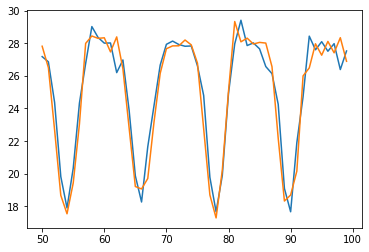

In [240]:
import matplotlib.pyplot as plt
plt.plot(train_results1['Train Predictions'][50:100])
plt.plot(train_results1['Actuals'][50:100])

In [241]:
val_predictions1 = model1.predict(X_val1).flatten()
val_results1 = pd.DataFrame(data={'Val Predictions':val_predictions1, 'Actuals':y_val1})
val_results1

,Val Predictions,Actuals
0,24.487268,23.0168
1,20.297617,18.2444
2,17.231289,18.1609
3,21.098799,21.0757
4,25.463902,23.4808
...,...,...
132,25.411478,23.9283
133,20.376606,19.2162
134,16.968288,18.2838
135,19.914303,20.9799


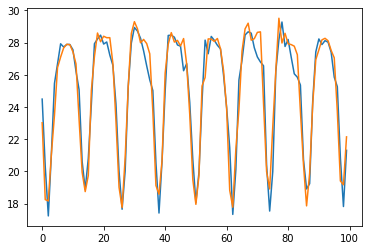

In [242]:
plt.plot(val_results1['Val Predictions'][:100])
plt.plot(val_results1['Actuals'][:100])

In [243]:
test_predictions1 = model1.predict(X_test1).flatten()
test_results1 = pd.DataFrame(data={'Test Predictions':test_predictions1, 'Actuals':y_test1})
test_results1

,Test Predictions,Actuals
0,28.823296,27.3832
1,28.005442,29.1106
2,28.667830,28.3582
3,28.033352,27.6765
4,27.212856,28.5187
...,...,...
136,27.671207,28.0642
137,27.408537,28.1230
138,26.703438,26.8624
139,24.634390,23.1842


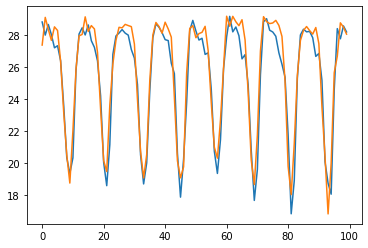

In [244]:
plt.plot(test_results1['Test Predictions'][:100])
plt.plot(test_results1['Actuals'][:100])

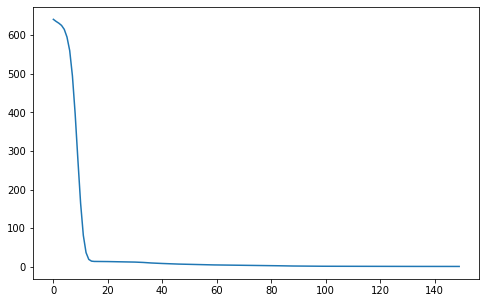

In [245]:
plt.figure(figsize=(8,5))
plt.plot(history1.history['loss'])

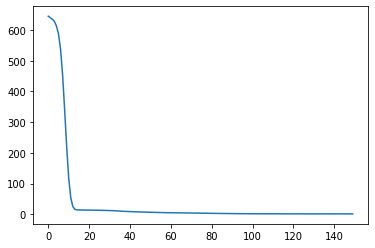

In [246]:
plt.plot(history1.history['val_loss'])

In [247]:
from sklearn.metrics import mean_squared_error as mse
def plot_predictions1(model, X, y, start=0, end=100):
  predictions = model.predict(X).flatten()
  df = pd.DataFrame(data={'Predictions':predictions, 'Actuals':y})
  plt.plot(df['Predictions'][start:end])
  plt.plot(df['Actuals'][start:end])
  return df, mse(y, predictions)

(     Predictions  Actuals
 0      28.823296  27.3832
 1      28.005442  29.1106
 2      28.667830  28.3582
 3      28.033352  27.6765
 4      27.212856  28.5187
 ..           ...      ...
 136    27.671207  28.0642
 137    27.408537  28.1230
 138    26.703438  26.8624
 139    24.634390  23.1842
 140    20.192732  18.7124
 
 [141 rows x 2 columns], 0.9262579920531481)

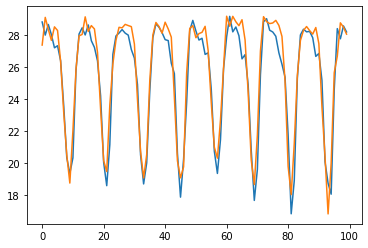

In [248]:
plot_predictions1(model1, X_test1, y_test1)